In [26]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots
import matplotlib.animation as animation
from scipy.sparse import dok_matrix
import multiprocessing as mp
import scipy as sp
import matplotlib.ticker as ticker
import project

In [27]:
#General plot parameters and size definition
plt.style.use('science')
plt.rcParams["figure.figsize"] = (12,7)
plt.rcParams.update({"axes.grid" : True})

In [28]:
def spikelet_fun(strength):
    return strength*  6.26066980e+01 - 1.44182439e-02

In [29]:
#loading up the parameters

params_HH = project.utils.load_HH()
params_LIF = project.utils.load_LIF()
params_IZH = project.utils.load_ISH()
params_ML = project.utils.load_ML()

#time parameters
t_final = 1500
dt = 0.01



#Other constant parameters
num_neurons = 5
#Variation for the initial conditions
volt_var = np.random.normal(0,5,num_neurons)
rec_var = np.random.normal(0,1,num_neurons)
Isyn = 0.3
tau = 0.65
V0 = -65 * np.ones(num_neurons) + volt_var
y0 = -65 * np.ones(num_neurons) + volt_var
w0 = 0 * np.ones(num_neurons) + rec_var
u0 = 0 * np.ones(num_neurons) + rec_var
n0 = 0 * np.ones(num_neurons) + rec_var
m0 = 0 * np.ones(num_neurons) + rec_var
h0 = 0 * np.ones(num_neurons) + rec_var
order = 2


#fixing random seed
np.random.seed(1234)

#generating the intensities
I_HH = np.zeros((int(t_final/dt),num_neurons))
I_IF = np.zeros((int(t_final/dt),num_neurons))
I_IZH = np.zeros((int(t_final/dt),num_neurons))
I_ML = np.zeros((int(t_final/dt),num_neurons))

for i in range(0,num_neurons):
    x_normal = np.random.normal(0,5,int(t_final/dt))
    x_if = np.random.normal(0,1.5,int(t_final/dt))
    I_HH[:,i] = 2.5 * (1 + 1*x_normal)
    I_IF[:,i] = 2.5 * (1 + 1*x_if)
    I_IZH[:,i] = 2.5 * (1 + 1*x_normal)
    I_ML[:,i] = 2.5 * (1+ 1*x_normal)
    #I_HH[:,i] = 2.5 
    #I_IF[:,i] = 2.5 
    #I_IZH[:,i] = 2.5
    #I_ML[:,i] = 2.5 

HH_gap_junction = np.zeros((int(t_final/dt),num_neurons))
HH_synaptic_current = np.zeros((int(t_final/dt),num_neurons))

IF_gap_junction = np.zeros((int(t_final/dt),num_neurons))
IF_synaptic_current = np.zeros((int(t_final/dt),num_neurons))

IZH_gap_junction = np.zeros((int(t_final/dt),num_neurons))
IZH_synaptic_current = np.zeros((int(t_final/dt),num_neurons))

ML_gap_junction = np.zeros((int(t_final/dt),num_neurons))
ML_synaptic_current = np.zeros((int(t_final/dt),num_neurons))

In [4]:
#Creating the Electrical and Chemical connectivity matrices, in this case for 10 neurons
E_matrix,seed = project.utils.create_matrix('electrical',num_neurons,connection_fraction_e=1)
C_matrix, seed = project.utils.create_matrix('chemical',num_neurons,connection_fraction_c=1)

In [67]:
dataHH_adjust, completeHH_adjust, matrixHH_adjust, synaptic_HH = project.models.HH_Neuron_Network_tests(dt,t_final,order,V0,n0,m0,h0,*params_HH,I_HH,Isyn,0.0012,tau,E_matrix,C_matrix,HH_gap_junction,HH_synaptic_current)
dataIF_adjust, completeIF_adjust, matrixIF_adjust, synaptic_IF = project.models.LIF_Neuron_Network_tests(dt, t_final,order,y0,*params_LIF,I_IF,Isyn,0.0012,tau,spikelet_fun(0.0012),E_matrix,C_matrix, IF_gap_junction, IF_synaptic_current)
dataIZH_adjust, completeIZH_adjust, matrixIZH_adjust, synaptic_IZH = project.models.IZH_Neuron_Network_tests(dt,t_final,order,y0,u0,I_IZH,Isyn,*params_IZH,0.004,tau,E_matrix,C_matrix,IZH_gap_junction,IZH_synaptic_current)
dataML_adjust, completeML_adjust, matrixML_adjust, synaptic_ML = project.models.ML_Neuron_Network_tests(dt,t_final,2,y0,w0,*params_ML,I_ML,Isyn,0.0008,tau,E_matrix,C_matrix, ML_gap_junction, ML_synaptic_current)

(-65.0, 25.0)

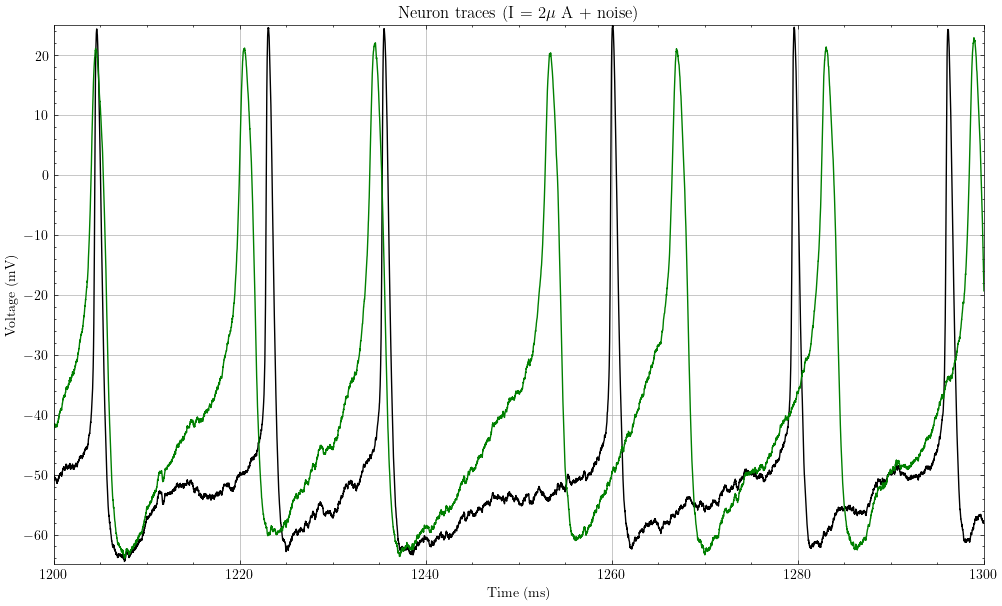

In [68]:
time = np.linspace(0,t_final,int(t_final/dt),)
plt.plot(time,dataHH_adjust[:,4], color = 'black')
plt.plot(time,dataML_adjust[:,4], color = 'green')
plt.title(r'Neuron traces (I = 2$\mu$ A + noise)')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.xlim(1200,1300)
plt.ylim(-65,25)

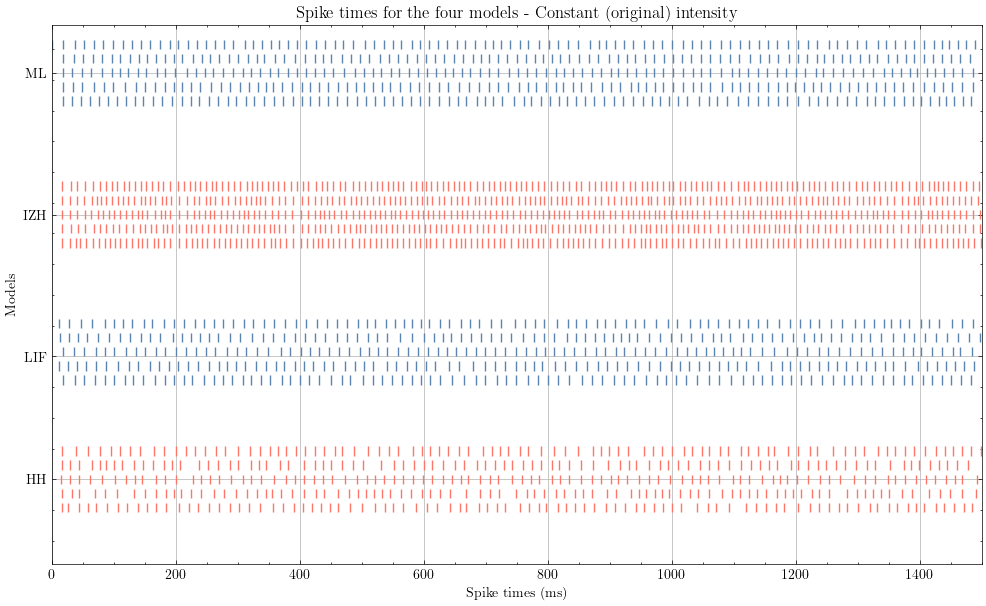

In [69]:
spike_HH_1 =  (np.argwhere(np.array(matrixHH_adjust.todense())[0,:]>0) * dt).flatten()
spike_HH_2 =  (np.argwhere(np.array(matrixHH_adjust.todense())[1,:]>0) * dt).flatten()
spike_HH_3 =  (np.argwhere(np.array(matrixHH_adjust.todense())[2,:]>0) * dt).flatten()
spike_HH_4 =  (np.argwhere(np.array(matrixHH_adjust.todense())[3,:]>0) * dt).flatten()
spike_HH_5 =  (np.argwhere(np.array(matrixHH_adjust.todense())[4,:]>0) * dt).flatten()

spike_IF_1 =  (np.argwhere(np.array(matrixIF_adjust.todense())[0,:]>0) * dt).flatten()
spike_IF_2 =  (np.argwhere(np.array(matrixIF_adjust.todense())[1,:]>0) * dt).flatten()
spike_IF_3 =  (np.argwhere(np.array(matrixIF_adjust.todense())[2,:]>0) * dt).flatten()
spike_IF_4 =  (np.argwhere(np.array(matrixIF_adjust.todense())[3,:]>0) * dt).flatten()
spike_IF_5 =  (np.argwhere(np.array(matrixIF_adjust.todense())[4,:]>0) * dt).flatten()

spike_IZH_1 =  (np.argwhere(np.array(matrixIZH_adjust.todense())[0,:]>0) * dt).flatten()
spike_IZH_2 = (np.argwhere(np.array(matrixIZH_adjust.todense())[1,:]>0) * dt).flatten()
spike_IZH_3 =  (np.argwhere(np.array(matrixIZH_adjust.todense())[2,:]>0) * dt).flatten()
spike_IZH_4 =  (np.argwhere(np.array(matrixIZH_adjust.todense())[3,:]>0) * dt).flatten()
spike_IZH_5 =  (np.argwhere(np.array(matrixIZH_adjust.todense())[4,:]>0) * dt).flatten()

spike_ML_1 = (np.argwhere(np.array(matrixML_adjust.todense())[0,:]>0) * dt).flatten()
spike_ML_2 = (np.argwhere(np.array(matrixML_adjust.todense())[1,:]>0) * dt).flatten()
spike_ML_3 =  (np.argwhere(np.array(matrixML_adjust.todense())[2,:]>0) * dt).flatten()
spike_ML_4 =  (np.argwhere(np.array(matrixML_adjust.todense())[3,:]>0) * dt).flatten()
spike_ML_5 =  (np.argwhere(np.array(matrixML_adjust.todense())[4,:]>0) * dt).flatten()

fig, ax = plt.subplots()

ax.eventplot(spike_HH_1, color = '#FC766AFF', linelengths=0.1, lineoffsets=0)
ax.eventplot(spike_HH_2,color='#FC766AFF',lineoffsets=0.15,linelengths=0.1)
ax.eventplot(spike_HH_3, color = '#FC766AFF', lineoffsets = 0.3, linelengths=0.1)
ax.eventplot(spike_HH_4, color = '#FC766AFF', lineoffsets = 0.45, linelengths=0.1)
ax.eventplot(spike_HH_5, color = '#FC766AFF', lineoffsets = 0.60, linelengths=0.1)

ax.eventplot(spike_IF_2,color = '#5B84B1FF',lineoffsets=1.5, linelengths=0.1)
ax.eventplot(spike_IF_1, color = '#5B84B1FF', lineoffsets= 1.35, linelengths=0.1)
ax.eventplot(spike_IF_3, color ='#5B84B1FF', lineoffsets= 1.65, linelengths=0.1)
ax.eventplot(spike_IF_4, color = '#5B84B1FF', lineoffsets= 1.80, linelengths=0.1)
ax.eventplot(spike_IF_5, color = '#5B84B1FF', lineoffsets= 1.95, linelengths=0.1)

ax.eventplot(spike_IZH_2,color = '#FC766AFF',lineoffsets= 3.15-0.2, linelengths=0.1 )
ax.eventplot(spike_IZH_1, color = '#FC766AFF', lineoffsets= 3.0-0.2, linelengths=0.1)
ax.eventplot(spike_IZH_3,color = '#FC766AFF',lineoffsets= 3.3-0.2, linelengths=0.1 )
ax.eventplot(spike_IZH_4,color = '#FC766AFF',lineoffsets= 3.45-0.2, linelengths=0.1 )
ax.eventplot(spike_IZH_5,color = '#FC766AFF',lineoffsets= 3.6-0.2, linelengths=0.1 )

ax.eventplot(spike_ML_2, color = '#5B84B1FF', lineoffsets= 4.65-0.2, linelengths=0.1)
ax.eventplot(spike_ML_1,color = '#5B84B1FF', lineoffsets= 4.5-0.2, linelengths=0.1)
ax.eventplot(spike_ML_3,color = '#5B84B1FF', lineoffsets= 4.80-0.2, linelengths=0.1)
ax.eventplot(spike_ML_4,color = '#5B84B1FF', lineoffsets= 4.95-0.2, linelengths=0.1)
ax.eventplot(spike_ML_5,color = '#5B84B1FF', lineoffsets= 5.1-0.2, linelengths=0.1)

ax.set_ylim(-0.6,5.1)
ax.set_ylabel('Models')
plt.yticks((0.3,1.6,3.1,4.6))
labels = [item.get_text() for item in ax.get_yticklabels()]
labels[0] = 'HH'
labels[1] = 'LIF'
labels[2] = 'IZH'
labels[3] = 'ML'

ax.set_yticklabels(labels, color = 'black')
ax.set_xlabel('Spike times (ms)')
ax.set_xlim(0,1500)

plt.title('Spike times for the four models - Constant (original) intensity')
plt.show()

(0.0, 10000.0)

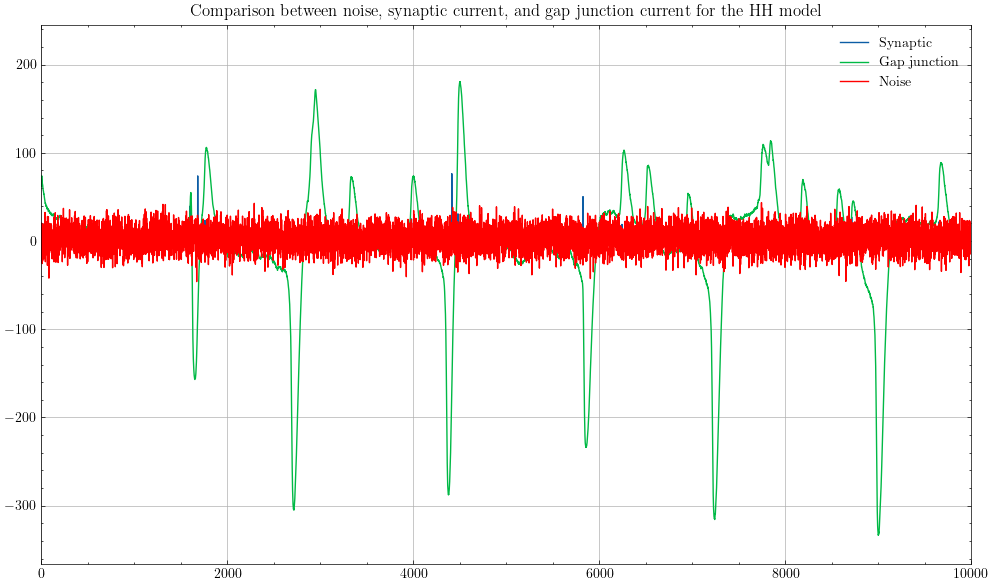

In [70]:
plt.plot(HH_synaptic_current[:,0], label = 'Synaptic')
plt.plot(HH_gap_junction[:,0], label = 'Gap junction')
plt.plot(I_HH[:,0], 'r-' ,label = 'Noise')
plt.legend()
plt.title('Comparison between noise, synaptic current, and gap junction current for the HH model')
plt.xlim(0,10000)

(0.0, 10000.0)

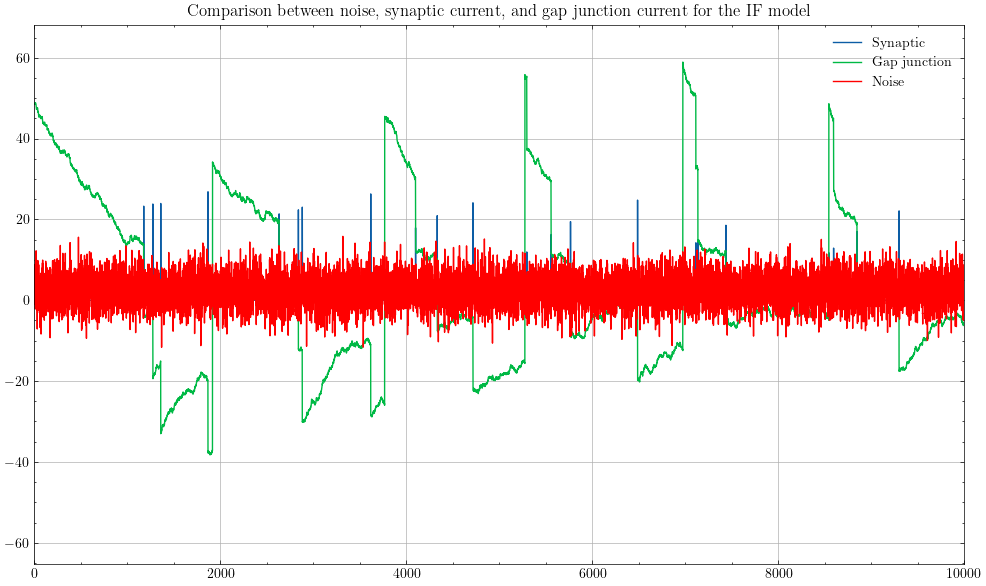

In [71]:
plt.plot(IF_synaptic_current[:,0], label = 'Synaptic')
plt.plot(IF_gap_junction[:,0], label = 'Gap junction')
plt.plot(I_IF[:,0], 'r-' ,label = 'Noise')
plt.legend()
plt.title('Comparison between noise, synaptic current, and gap junction current for the IF model')
plt.xlim(0,10000)

(0.0, 10000.0)

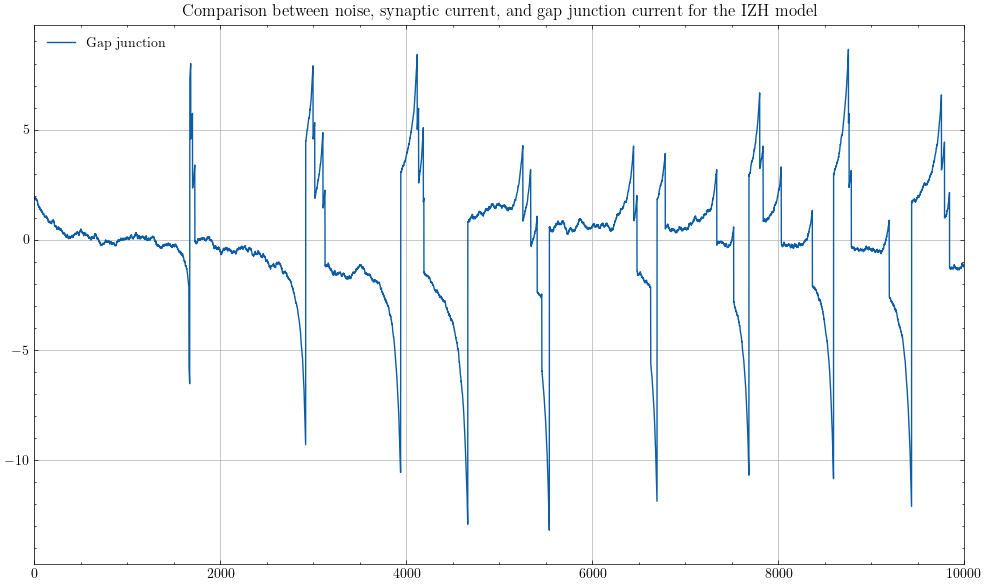

In [72]:
#plt.plot(IZH_synaptic_current[:,0], label = 'Synaptic')
plt.plot(IZH_gap_junction[:,0], label = 'Gap junction')
#plt.plot(I_IZH[:,0], 'r-' ,label = 'Noise')
plt.legend()
plt.title('Comparison between noise, synaptic current, and gap junction current for the IZH model')
plt.xlim(0,10000)

(0.0, 10000.0)

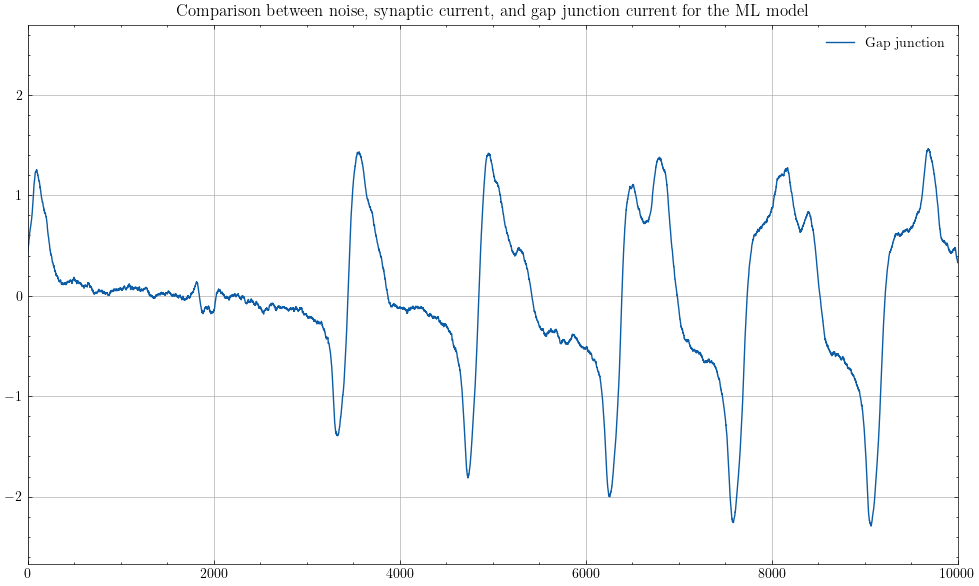

In [73]:
#plt.plot(ML_synaptic_current[:,0], label = 'Synaptic')
plt.plot(ML_gap_junction[:,0], label = 'Gap junction')
#plt.plot(I_ML[:,0], 'r-' ,label = 'Noise')
plt.legend()
plt.title('Comparison between noise, synaptic current, and gap junction current for the ML model')
plt.xlim(0,10000)

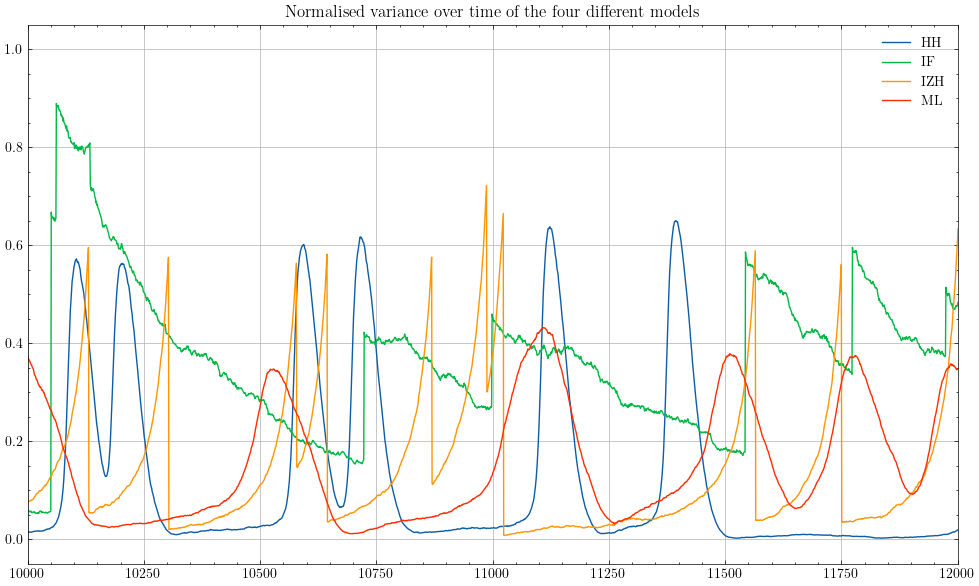

In [74]:
#Compute the variance
var_HH = np.var(HH_gap_junction, axis = 1) / np.max(np.var(HH_gap_junction, axis = 1))
var_IF = np.var(IF_gap_junction, axis = 1) / np.max(np.var(IF_gap_junction, axis = 1))
var_IZH = np.var(IZH_gap_junction, axis = 1) / np.max(np.var(IZH_gap_junction, axis = 1))
var_ML = np.var(ML_gap_junction, axis = 1) / np.max(np.var(ML_gap_junction, axis = 1))


plt.plot(var_HH, label = 'HH')
plt.plot(var_IF, label = 'IF')
plt.plot(var_IZH, label = 'IZH')
plt.plot(var_ML, label = 'ML')
plt.xlim(10000,12000)
plt.title('Normalised variance over time of the four different models')
plt.legend()